<a href="https://colab.research.google.com/github/jewookwak/AI/blob/master/generate_model88_cw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip uninstall tensorflow -y
!pip uninstall keras -y
!pip install tensorflow==2.4.0
!pip install h5py==2.10.0

Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Successfully uninstalled tensorflow-2.9.2
Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Successfully uninstalled keras-2.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 394.7 MB 15 kB/s 
     |████████████████████████████████| 132 kB 63.9 MB/s 
     |████████████████████████████████| 14.8 MB 60.4 MB/s 
     |████████████████████████████████| 462 kB 88.8 MB/s 
     |████████████████████████████████| 2.9 MB 60.9 MB/s 
     |████████████████████████████████| 3.8 MB 82.1 MB/s 
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=4895860350d24c335b4c9806c4f6894c808c6f86cffab6f9b046b4d0c9fb923d
  Stored in directory: /root/.cache/pip/wheels/3f/e3/ec/8a8336ff196023622fbcb36de0c5a5c218cbb24111d1d4c7f2
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-lin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#!unzip -qq "/content/drive/MyDrive/지능제어/termproject/datasets/video88_cw.zip" -d "/content/drive/MyDrive/지능제어/termproject/datasets"

In [3]:
import os
import random
import fnmatch
import datetime
import pickle

import numpy as np
np.set_printoptions(formatter={'float_kind':lambda x: "%.4f" %x})

In [4]:
import pandas as pd 
pd.set_option('display.width',300)
pd.set_option('display.float_format','{:.4f}'.format)
pd.set_option('display.max_colwidth',200)

In [5]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

print(tf.__version__ )


2.4.0


In [6]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [7]:
import cv2
from imgaug import augmenters as img_aug
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [8]:
data_dir = '/content/drive/MyDrive/지능제어/termproject/video8_cw'
file_list = os.listdir(data_dir)
image_paths = []
steering_angles=[]
pattern="*.png"
for filename in file_list:
    if fnmatch.fnmatch(filename, pattern):
        image_paths.append(os.path.join(data_dir,filename))
        angle=int(filename[-7:-4])
        steering_angles.append(angle)

In [9]:
image_index=30
plt.show(Image.open(image_paths[image_index]))
print("image_path: %s" %image_paths[image_index])
print("steering_angle: %d" %steering_angles[image_index])
df=pd.DataFrame()
df['ImagePath']=image_paths
df['Angle']=steering_angles

image_path: /content/drive/MyDrive/지능제어/termproject/video8_cw/train_06948_135.png
steering_angle: 135


In [10]:
image_index=25
plt.show(Image.open(image_paths[image_index]))
print("image_path: %s" %image_paths[image_index])
print("steering_angle: %d" %steering_angles[image_index])
df=pd.DataFrame()
df['ImagePath']=image_paths
df['Angle']=steering_angles

image_path: /content/drive/MyDrive/지능제어/termproject/video8_cw/train_07013_135.png
steering_angle: 135


(array([1258.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 8993.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        8484.0000]),
 array([45.0000, 48.6000, 52.2000, 55.8000, 59.4000, 63.0000, 66.6000,
        70.2000, 73.8000, 77.4000, 81.0000, 84.6000, 88.2000, 91.8000,
        95.4000, 99.0000, 102.6000, 106.2000, 109.8000, 113.4000, 117.0000,
        120.6000, 124.2000, 127.8000, 131.4000, 135.0000]),
 <a list of 25 Patch objects>)

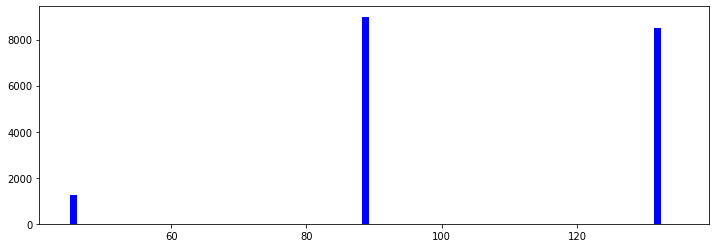

In [11]:
num_of_bins=25
hist,bins=np.histogram(df['Angle'],num_of_bins)
fig,axes=plt.subplots(1,1,figsize=(12,4))
axes.hist(df['Angle'],bins=num_of_bins, width=1, color='blue')

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths,steering_angles, test_size=0.2)
print("Training data: %d\nValidation data: %d" %(len(X_train),len(X_valid)))

Training data: 14988
Validation data: 3747


Text(0.5, 1.0, 'Validation Data')

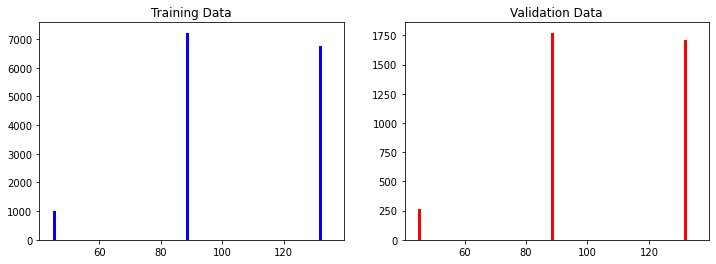

In [13]:
fig, axes = plt.subplots(1,2,figsize=(12,4))
axes[0].hist(y_train, bins=num_of_bins, width=1, color='blue')
axes[0].set_title('Training Data')
axes[1].hist(y_valid, bins=num_of_bins, width=1, color='red')
axes[1].set_title('Validation Data')

In [14]:
def my_imread(image_path):
    image = cv2.imread(image_path)
    return image

def img_preprocess(image):
    image=image/255
    image = cv2.resize(image, (200,66))
    return image

Text(0.5, 1.0, 'processed')

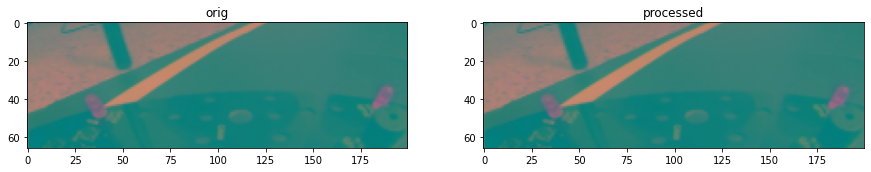

In [15]:
fig, axes = plt.subplots(1,2,figsize=(15,10))
image_orig=my_imread(image_paths[image_index])
image_processed=img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

In [16]:
def nvidia_model():
    model = Sequential(name='Nvidia_Model')
    model.add(Conv2D(24,(5,5), strides=(2,2),input_shape=(66,200,3), activation='elu'))
    model.add(Conv2D(36,(5,5), strides=(2,2), activation='elu'))
    model.add(Conv2D(64,(3,3), activation='elu'))
    model.add(Dropout(0.2))
    model.add(Conv2D(64,(3,3), activation='elu'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    
    optimizer=Adam(lr=1e-3)
    model.compile(loss='mse', optimizer=optimizer)
    
    return model
model =nvidia_model()
print(model.summary())

Model: "Nvidia_Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 45, 64)        20800     
_________________________________________________________________
dropout (Dropout)            (None, 12, 45, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 43, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 27520)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 27520)            

In [17]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []
        
        for i in range(batch_size):
            random_index=random.randint(0,len(image_paths)-1)
            image_path=image_paths[random_index]
            image=my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]
            
            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
        yield(np.asarray(batch_images), np.asarray(batch_steering_angles))

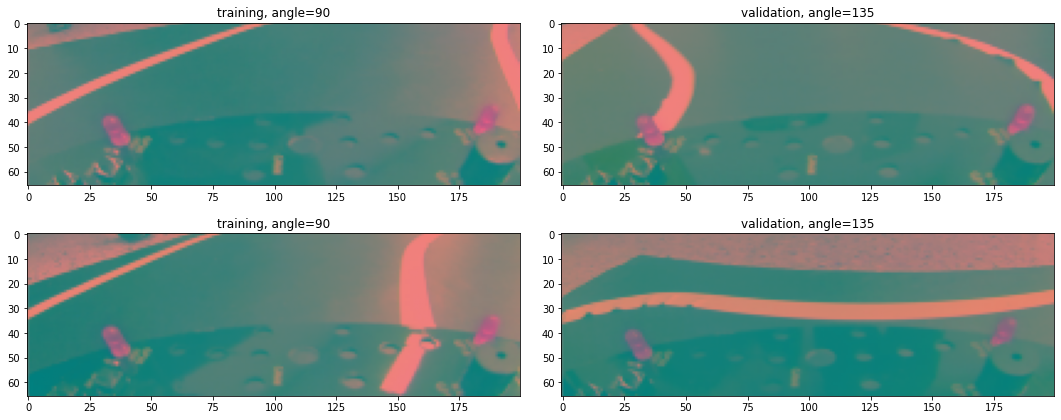

In [18]:
ncol = 2
nrow = 2

X_train_batch, y_train_batch = next(image_data_generator(X_train, y_train, nrow))
X_valid_batch, y_valid_batch = next(image_data_generator(X_valid, y_valid, nrow))

fig, axes = plt.subplots(nrow, ncol, figsize=(15,6))
fig.tight_layout()

for i in range(nrow):
    axes[i][0].imshow(X_train_batch[i])
    axes[i][0].set_title("training, angle=%s" %y_train_batch[i])
    axes[i][1].imshow(X_valid_batch[i])
    axes[i][1].set_title("validation, angle=%s" %y_valid_batch[i])

In [19]:
model_output_dir = "/content/drive/MyDrive/지능제어/termproject/result88_cw"
checkpoint_callback = tensorflow.keras.callbacks.ModelCheckpoint(filepath=os.path.join(model_output_dir,'lane_navigation_check88_cw.h5'), verbose=1, save_best_only=True)

In [21]:
history = model.fit_generator(image_data_generator(X_train, y_train, batch_size=100), steps_per_epoch=300, epochs=20, validation_data = image_data_generator(X_valid, y_valid, batch_size=100),validation_steps=200, verbose=1, shuffle=1, callbacks=[checkpoint_callback])

Epoch 1/20
300/300 [==============================] - 722s 2s/step - loss: 1506.1782 - val_loss: 389.2544

Epoch 00001: val_loss improved from inf to 389.25436, saving model to /content/drive/MyDrive/지능제어/termproject/result88_cw/lane_navigation_check88_cw.h5
Epoch 2/20
300/300 [==============================] - 312s 1s/step - loss: 385.9684 - val_loss: 334.3369

Epoch 00002: val_loss improved from 389.25436 to 334.33685, saving model to /content/drive/MyDrive/지능제어/termproject/result88_cw/lane_navigation_check88_cw.h5
Epoch 3/20
300/300 [==============================] - 314s 1s/step - loss: 341.3052 - val_loss: 356.9698

Epoch 00003: val_loss did not improve from 334.33685
Epoch 4/20
300/300 [==============================] - 315s 1s/step - loss: 307.6390 - val_loss: 297.5373

Epoch 00004: val_loss improved from 334.33685 to 297.53732, saving model to /content/drive/MyDrive/지능제어/termproject/result88_cw/lane_navigation_check88_cw.h5
Epoch 5/20
300/300 [===================

In [22]:
model.save(os.path.join(model_output_dir,'lane_navigation_final88_cw.h5'))

In [23]:
history_path = os.path.join(model_output_dir, 'history.pickle88_cw')
with open(history_path, 'wb') as f:
  pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

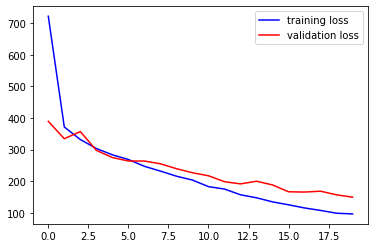

In [24]:
#history.history

history_path=os.path.join(model_output_dir,'history.pickle88_cw')
with open(history_path, 'rb') as f:
  history = pickle.load(f)

history
plt.plot(history['loss'], color='blue')
plt.plot(history['val_loss'], color='red')
plt.legend(["training loss","validation loss"])

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize_prediction(Y_true, Y_pred):
  mse = mean_squared_error(Y_true, Y_pred)
  r_squared = r2_score(Y_true, Y_pred)

  print(f'mse={mse:.2}')
  print(f'r_squared={r_squared:.2%}')
  print()

In [26]:
def predict_and_summarize(X,Y):
  model=load_model(f'{model_output_dir}/lane_navigation_check88_cw.h5')
  Y_pred = model.predict(X)
  summarize_prediction(Y, Y_pred)
  return Y_pred

mse=1.1e+02
r_squared=84.18%



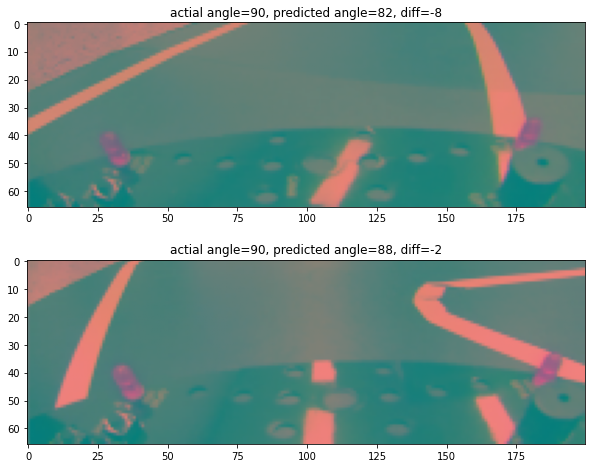

In [27]:
n_tests = 100
X_test, y_test = next(image_data_generator(X_valid, y_valid, 100))

y_pred = predict_and_summarize(X_test,y_test)

n_tests_show=2
fig,axes=plt.subplots(n_tests_show,1,figsize=(10,4*n_tests_show))
for i in range(n_tests_show):
  axes[i].imshow(X_test[i])
  axes[i].set_title(f"actial angle={y_test[i]}, predicted angle={int(y_pred[i])}, diff={int(y_pred[i])-y_test[i]}")

In [ ]:
model.load_weights('/content/drive/MyDrive/지능제어/termproject/result88_cw/lane_navigation_check8_cw.h5')

In [ ]:
history = model.fit_generator(image_data_generator(X_train, y_train, batch_size=100), steps_per_epoch=300, epochs=10, validation_data = image_data_generator(X_valid, y_valid, batch_size=100),validation_steps=200, verbose=1, shuffle=1, callbacks=[checkpoint_callback])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
300/300 [==============================] - 378s 1s/step - loss: 299.9560 - val_loss: 240.0119

Epoch 00001: val_loss improved from inf to 240.01190, saving model to /content/drive/MyDrive/지능제어/termproject/result8_cw/lane_navigation_check8_cw.h5
Epoch 2/10
300/300 [==============================] - 373s 1s/step - loss: 227.0268 - val_loss: 248.9366

Epoch 00002: val_loss did not improve from 240.01190
Epoch 3/10
300/300 [==============================] - 369s 1s/step - loss: 205.3133 - val_loss: 211.4582

Epoch 00003: val_loss improved from 240.01190 to 211.45822, saving model to /content/drive/MyDrive/지능제어/termproject/result8_cw/lane_navigation_check8_cw.h5
Epoch 4/10
300/300 [==============================] - 368s 1s/step - loss: 182.2965 - val_loss: 203.5170

Epoch 00004: val_loss improved from 211.45822 to 203.51704, saving model to /content/drive/MyDrive/지능제어/termproject/result8_cw/lane_navigation_check8_cw.h5
Epoch 5/10
300/300 [==========================

In [ ]:
model.save(os.path.join(model_output_dir,'lane_navigation_final88_cw.h5'))

In [ ]:
history_path = os.path.join(model_output_dir, 'history.pickle88_cw')
with open(history_path, 'wb') as f:
  pickle.dump(history.history, f, pickle.HIGHEST_PROTOCOL)

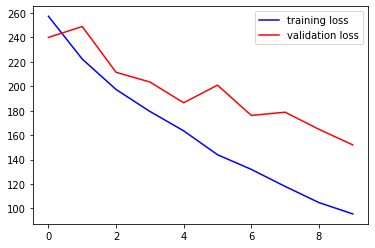

In [ ]:
#history.history

history_path=os.path.join(model_output_dir,'history.pickle88_cw')
with open(history_path, 'rb') as f:
  history = pickle.load(f)

history
plt.plot(history['loss'], color='blue')
plt.plot(history['val_loss'], color='red')
plt.legend(["training loss","validation loss"])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def summarize_prediction(Y_true, Y_pred):
  mse = mean_squared_error(Y_true, Y_pred)
  r_squared = r2_score(Y_true, Y_pred)

  print(f'mse={mse:.2}')
  print(f'r_squared={r_squared:.2%}')
  print()

In [ ]:
def predict_and_summarize(X,Y):
  model=load_model(f'{model_output_dir}/lane_navigation_check88_cw.h5')
  Y_pred = model.predict(X)
  summarize_prediction(Y, Y_pred)
  return Y_pred

mse=1.5e+02
r_squared=75.57%



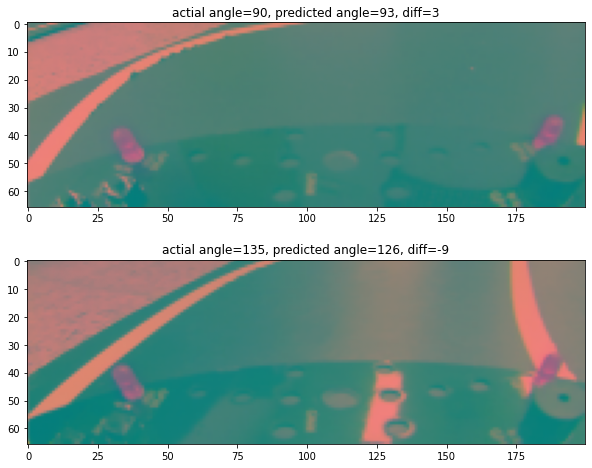

In [ ]:
n_tests = 100
X_test, y_test = next(image_data_generator(X_valid, y_valid, 100))

y_pred = predict_and_summarize(X_test,y_test)

n_tests_show=2
fig,axes=plt.subplots(n_tests_show,1,figsize=(10,4*n_tests_show))
for i in range(n_tests_show):
  axes[i].imshow(X_test[i])
  axes[i].set_title(f"actial angle={y_test[i]}, predicted angle={int(y_pred[i])}, diff={int(y_pred[i])-y_test[i]}")